In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Advantage / Disadvantage

Given two fair $n$-sided dice, what is the probability distribution of various binary functions on their results?

For example, DnD has the concept of "advantage" and "disadvantage". How does the probablity distribution skew for these two cases? 

In [2]:
def compute_func_prob(n, func):
    counts = defaultdict(lambda: 0)
    
    # Count frequencies
    for i in range(1,n+1):
        for j in range(1,n+1):
            val = func(i,j)
            counts[val] += 1
            
    # Compute probabilities
    probs = {}
    total = n * n
    for val, freq in counts.items():
        probs[val] = freq / total
        
    return probs

In [3]:
def plot_func_probs(n, func, title):
    # Compute values
    probs = compute_func_prob(n, func)
    min_val = min(probs.keys())
    max_val = max(probs.keys())
    
    # Compute mean
    mean = sum(val*pdf for val, pdf in probs.items())
    
    # Plot PDF and mean
    plt.figure(figsize=(10,8))
    plt.bar(probs.keys(), probs.values(), label='PDF');
    plt.axvline(x=mean, linestyle='--', color='red', label='Mean')
    plt.xticks(list(range(min_val, max_val+1)));
    plt.xlabel('Dice value');
    plt.ylabel('Probability density');
    plt.title(title)
    plt.legend()

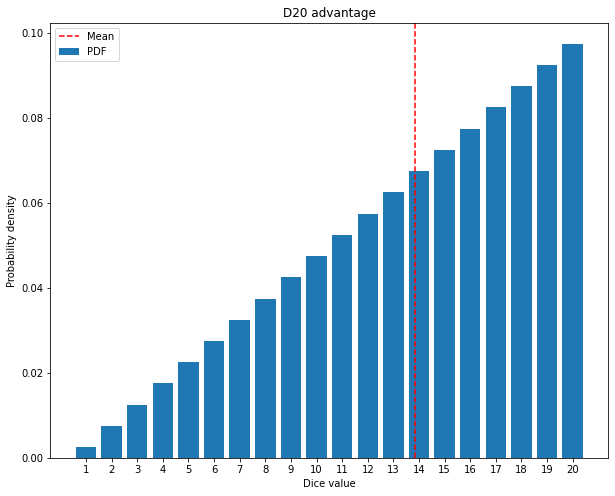

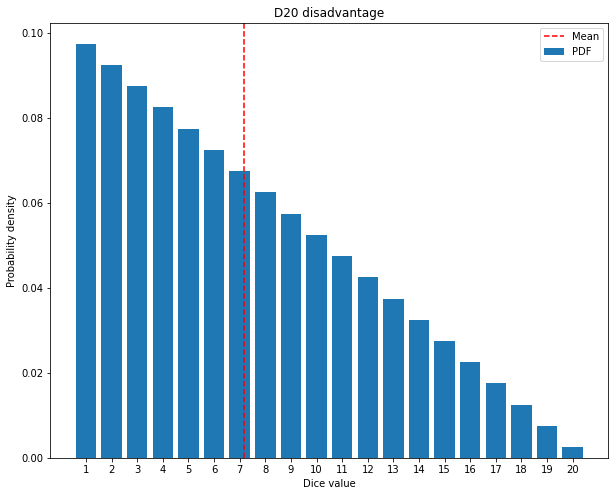

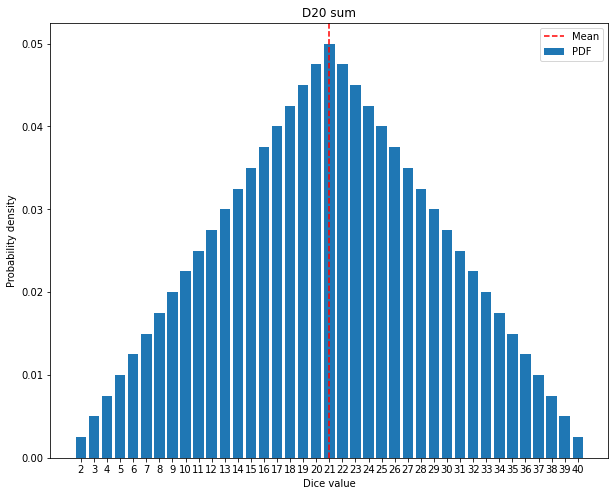

In [5]:
plot_func_probs(20, lambda x,y: max(x,y), 'D20 advantage')
plot_func_probs(20, lambda x,y: min(x,y), 'D20 disadvantage')
plot_func_probs(20, lambda x,y: x+y, 'D20 sum')

# Ability checks

A related question is that of "ability checks" where a player must roll higher than a minimum to succeed.

The probability of success is skewed by a roll with advantage/disadvantage.

In [58]:
def compute_check_prob(n, func):
    # Compute values
    func_probs = compute_func_prob(n, func)
    chk_probs = {0: sum(func_probs.values())}
    for i in range(1,n+1):
        chk_probs[i] = chk_probs[i-1] - func_probs[i]
    return chk_probs

def plot_check_probs(n, func, title):
    # Compute values
    probs = compute_check_prob(n, func)
    min_val = min(probs.keys())
    max_val = max(probs.keys())
        
    # Plot PDF and mean
    ns = list(range(n+1))
    plt.figure(figsize=(10,8))
    plt.bar(probs.keys(), probs.values(), label='PDF');
    plt.xticks(list(range(min_val, max_val+1)));
    plt.yticks([ 0.1*i for i in range(11)]);
    plt.xlabel('Threshold');
    plt.ylabel('Success probability');
    plt.title(title)
    plt.legend()

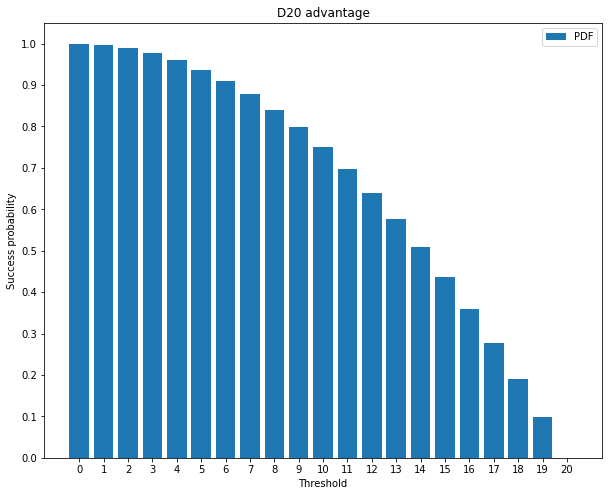

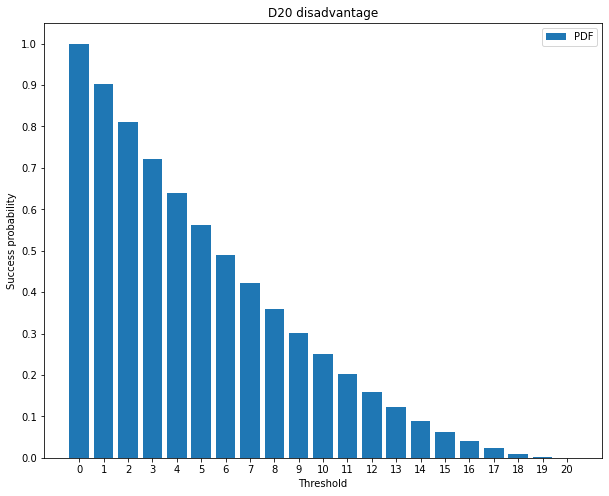

In [59]:
plot_check_probs(20, lambda x,y: max(x,y), 'D20 advantage')
plot_check_probs(20, lambda x,y: min(x,y), 'D20 disadvantage')